In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv("housing.csv")
data.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [3]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', delim_whitespace=True, names=names)

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
#Counting the value for categorical columns
print(df['CHAS'].value_counts())
print(df['RAD'].value_counts())

0    471
1     35
Name: CHAS, dtype: int64
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64


In [11]:
#These are the columns where it fits into the categorical columns so that we replace the na value with the mode

df['CHAS']=df['CHAS'].fillna(0)  #Because the mode of this column is '0'.
df['RAD']=df['RAD'].fillna(df['RAD'].mode())

In [12]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

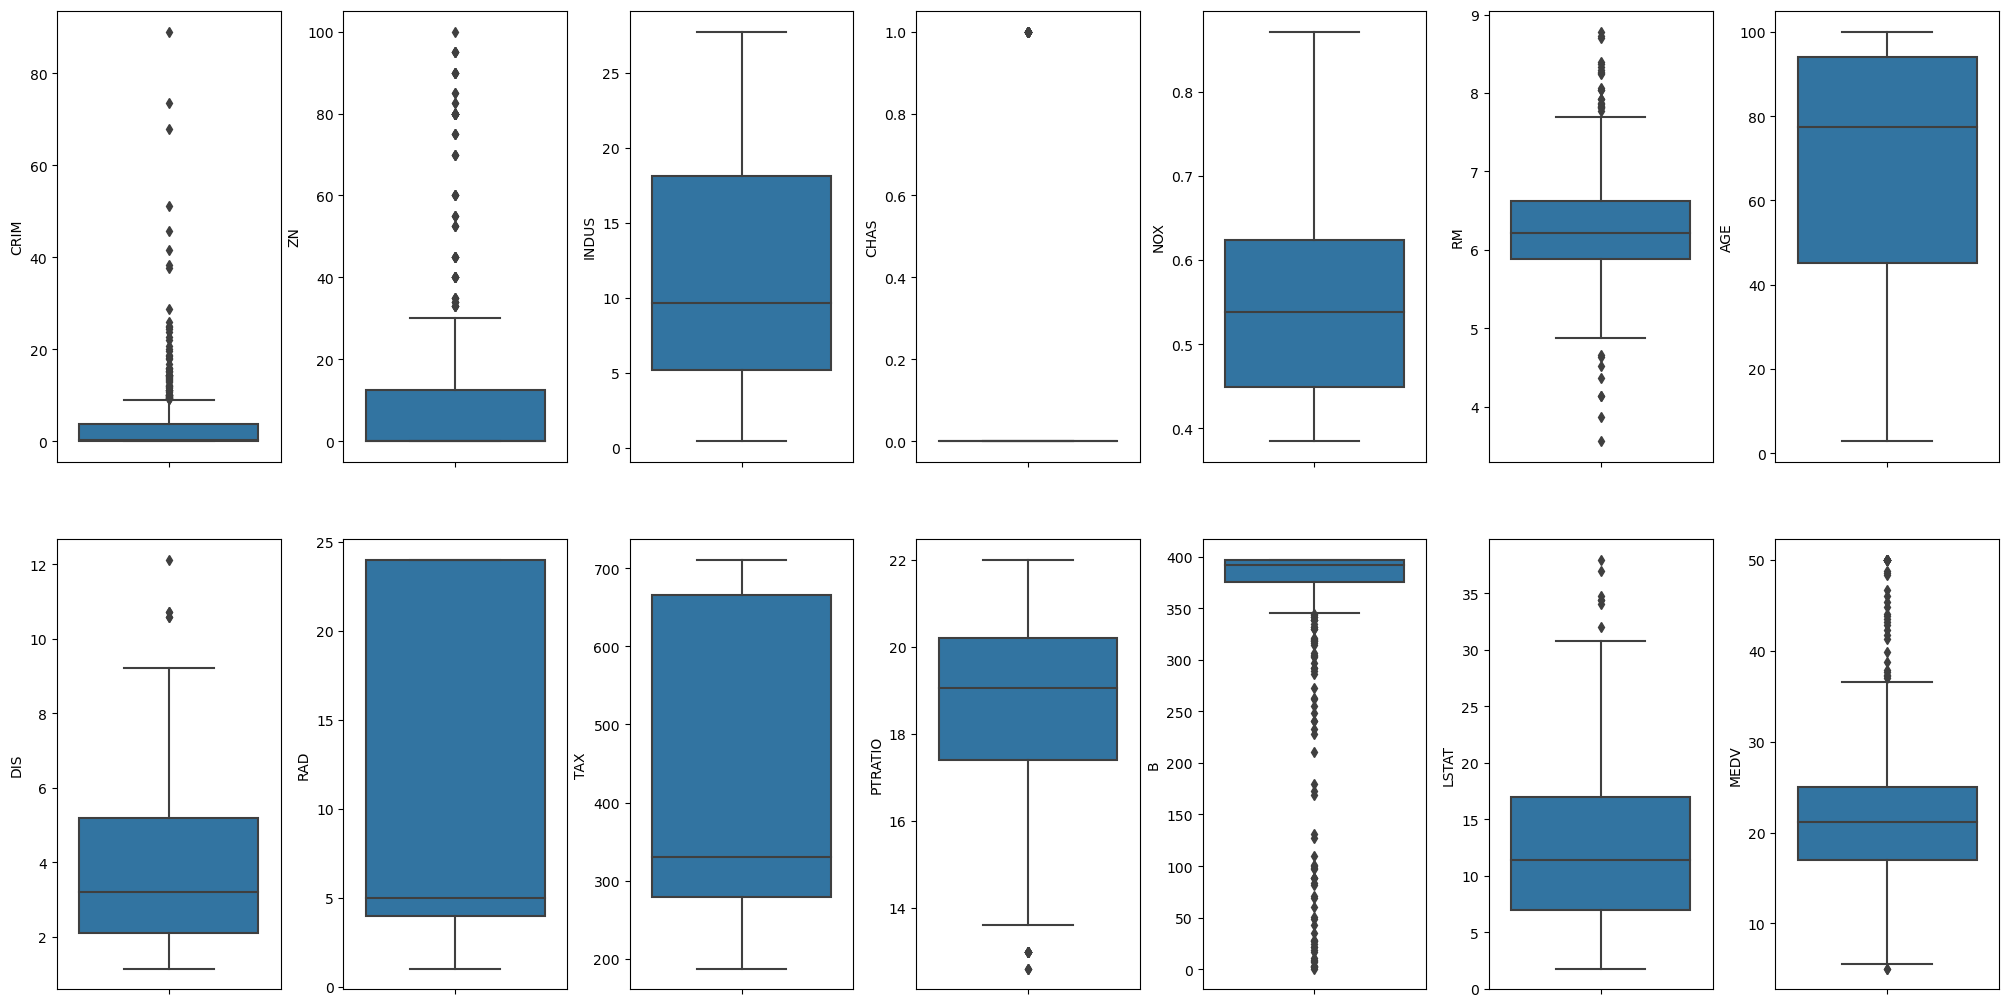

In [13]:
#Box plottng for finding the outliers
fig, axs = plt.subplots(nrows=2,ncols=7,figsize=(20,10))
axs = axs.flatten()     #Flattens the grid of subplots into a 1D array of axes objects.
index = 0
for k,v in df.items():
    sns.boxplot(y=k, data=df,ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [14]:
# Define the target variable column name
target_column = 'MEDV'

# Calculate Q1 and Q3 for the target variable
Q1 = df[target_column].quantile(0.25)
Q3 = df[target_column].quantile(0.75)

# Calculate the Interquartile Range (IQR) for the target variable
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers in the target variable
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

# Remove outliers from the 'MEDV' column
# df = df[(df[target_column] >= LB) & (df[target_column] <= UB)]
df = df[~(df['MEDV'] >= 50.0)]

# Display the DataFrame without target variable outliers
print("DataFrame without target variable outliers:")
print(df)

DataFrame without target variable outliers:
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.9

In [16]:
#We replace the name of 'MEDV'
df.rename(columns={'MEDV':'PRICE'},inplace=True)

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


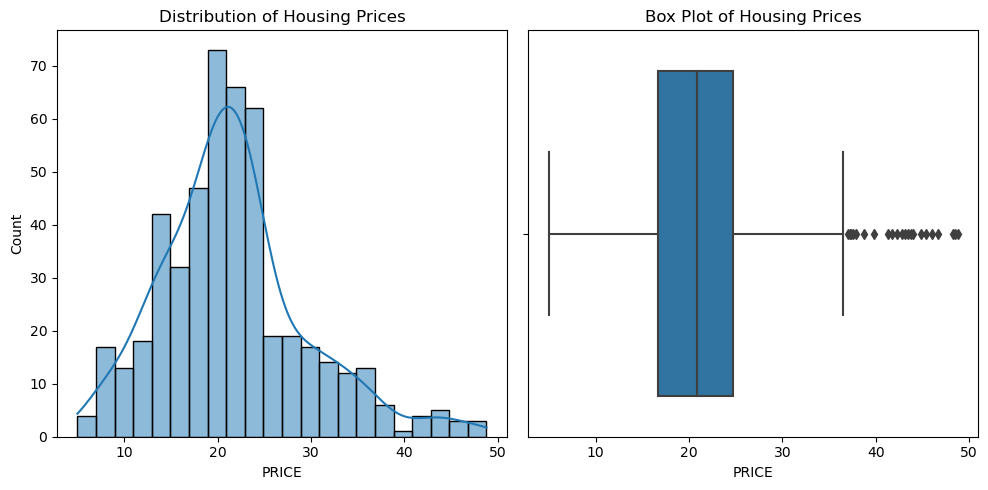

In [17]:
# Target Variable (Price) Analysis
plt.figure(figsize=(10, 5))

# Histogram of Housing Prices
plt.subplot(1, 2, 1)
sns.histplot(df['PRICE'], kde=True)
plt.title('Distribution of Housing Prices')

# Box Plot of Housing Prices
plt.subplot(1, 2, 2)
sns.boxplot(df['PRICE'])
plt.title('Box Plot of Housing Prices')

plt.tight_layout()
plt.show()

# Regression

Start work from here

In [18]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.pipeline import make_pipeline

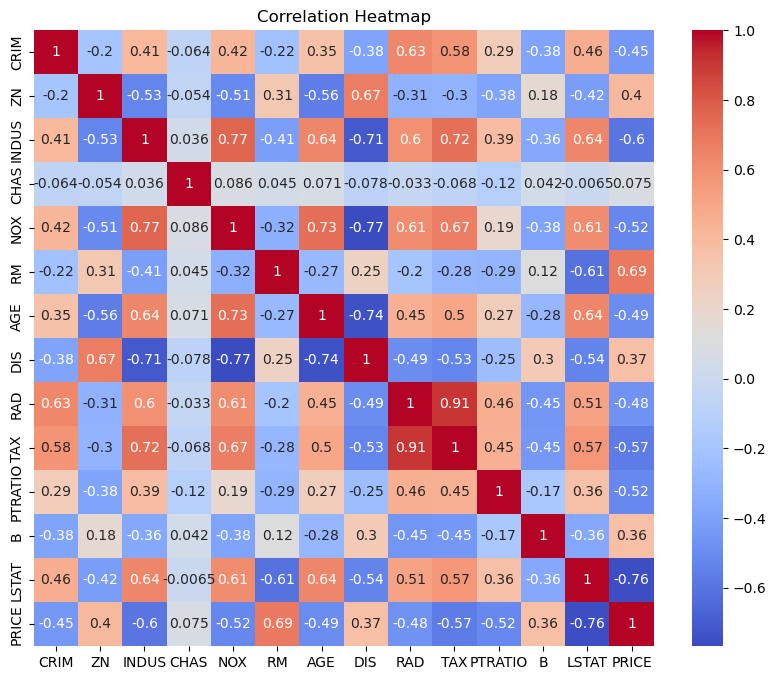

In [19]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
#Feature Selection with the help of correlation heatmap where we using the threshold value will be 0.40.
#Feature_Selected>0.10;
target_correlation = correlation_matrix['PRICE'].abs()
print(target_correlation )

CRIM       0.450115
ZN         0.404608
INDUS      0.600005
CHAS       0.074803
NOX        0.524451
RM         0.686634
AGE        0.492915
DIS        0.368813
RAD        0.476296
TAX        0.572442
PTRATIO    0.518641
B          0.364928
LSTAT      0.759837
PRICE      1.000000
Name: PRICE, dtype: float64


In [21]:
#Data for training purpose will be start this stage

X = df.drop('PRICE', axis=1)
y = df['PRICE']

In [22]:
#Here we using the column transformer method for applying one method at a time on all the columns
num_cols = X.columns
# X['LSTAT']. = X['LSTAT'].values.reshape(-1, 1)
col_trans=make_column_transformer((StandardScaler(),num_cols),remainder='passthrough')
col_trans.fit(X)
X= col_trans.transform(X)
col_trans.get_feature_names_out()

array(['standardscaler__CRIM', 'standardscaler__ZN',
       'standardscaler__INDUS', 'standardscaler__CHAS',
       'standardscaler__NOX', 'standardscaler__RM', 'standardscaler__AGE',
       'standardscaler__DIS', 'standardscaler__RAD',
       'standardscaler__TAX', 'standardscaler__PTRATIO',
       'standardscaler__B', 'standardscaler__LSTAT'], dtype=object)

In [23]:
#Splitting the Data set in training and testing purpose

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30, random_state = 100)

In [30]:
#Linear Regression
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
r2_score_lr = r2_score(Y_test, Y_pred)

print('The accuracy is' , r2_score_lr * 100, '%')

The accuracy is 80.23624112243391 %
